# Carga y preparación de Datos

In [ ]:
import pandas as pd

df_data = pd.read_csv("https://raw.githubusercontent.com/jonasdieckmann/prophet_tutorial/main/passengers.csv")

#Subconjunto de entrenamiento del 2012 al 2022
df_data_train = df_data[df_data["Month"] < "2023-01"]
#display(df_data_train)

#Subconjunto de prueba del 2023 para adelante
df_data_test = df_data[df_data["Month"] >= "2023-01"]
display(df_data_test)




,Month,Passengers
132,2023-01,417
133,2023-02,391
134,2023-03,419
135,2023-04,461
136,2023-05,472
137,2023-06,535
138,2023-07,622
139,2023-08,606
140,2023-09,508
141,2023-10,461


# Descomposición de los datos de entrenamiento



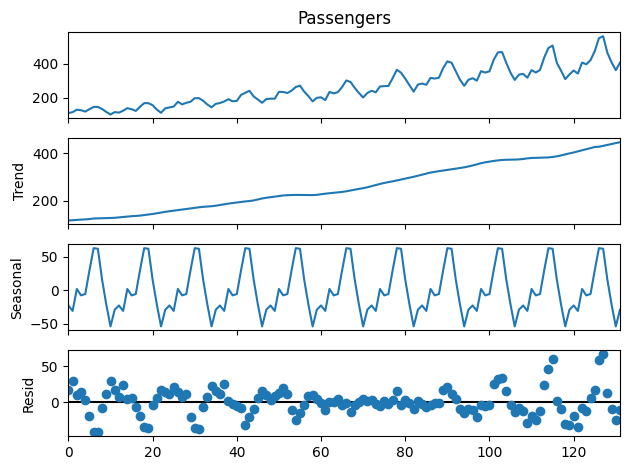

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.Passengers, model='additive', extrapolate_trend='freq', period=12)

decompose.plot().show()

# Ajuste de modelos con Facebook Prophet


In [ ]:
df_train_prophet = df_data_train

# ds = datestamp/marca de fecha
df_train_prophet = df_train_prophet.rename(columns={"Month": "ds"})
df_train_prophet = df_train_prophet.rename(columns={"Passengers": "y"})

In [ ]:
from prophet import Prophet
model_prophet = Prophet()

model_prophet.fit(df_train_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0qdac04m/wt5g6qd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0qdac04m/fhtnmyh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14129', 'data', 'file=/tmp/tmp0qdac04m/wt5g6qd7.json', 'init=/tmp/tmp0qdac04m/fhtnmyh4.json', 'output', 'file=/tmp/tmp0qdac04m/prophet_modelwgc8bmxv/prophet_model-20240323163108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Haciendo predicciones

In [ ]:
df_future = model_prophet.make_future_dataframe(periods=12, freq='MS')
display(df_future)

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
139,2023-08-01
140,2023-09-01
141,2023-10-01
142,2023-11-01


In [ ]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
139,2023-08-01,532.0,507.0,557.0
140,2023-09-01,484.0,459.0,511.0
141,2023-10-01,446.0,422.0,471.0
142,2023-11-01,416.0,391.0,441.0
143,2023-12-01,449.0,424.0,472.0


<ipython-input-18-a1aee09fd9f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])


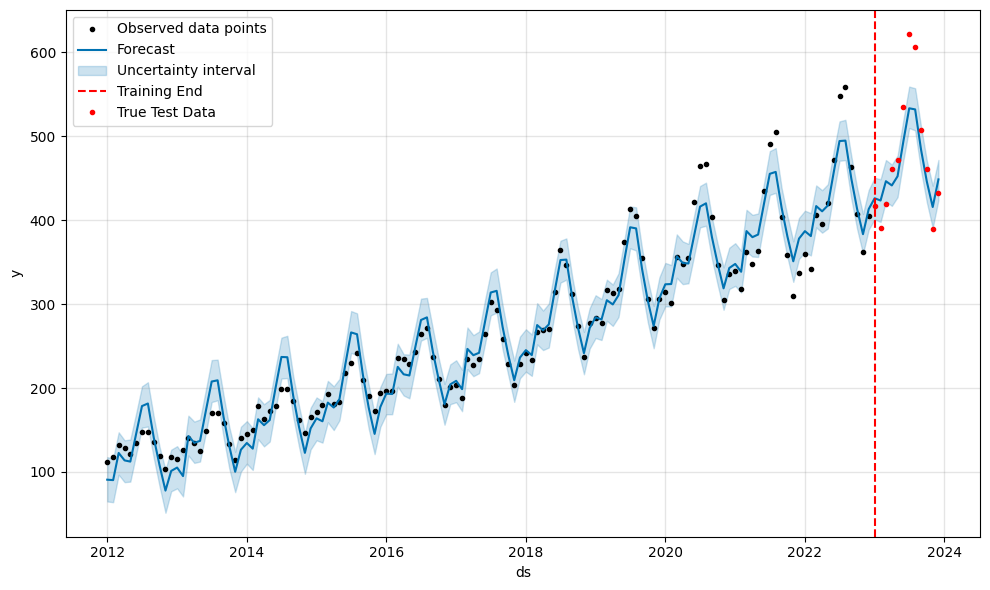

In [ ]:
import matplotlib.pyplot as plt

# plot the time series
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])
plt.plot(df_data_test['Month'], df_data_test['Passengers'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()